In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from helpers import OutlierDetection
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif 

import pickle

churn=pd.read_csv('telco-customer_churn.csv')

## Basic Information Pulls

In [2]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
print(f"Dataset Shape: {churn.shape[0]} rows, {churn.shape[1]} cols")

Dataset Shape: 7043 rows, 21 cols


## Label Encoding Categorical Data

In [7]:
categorical=churn.select_dtypes(include=['object'])
numerical=churn.select_dtypes(exclude=['object'])

In [8]:
encoder=preprocessing.LabelEncoder()

for col in categorical:
    categorical[col]=encoder.fit_transform(categorical[col])

In [9]:
churn_labeled=pd.concat([categorical,numerical], axis=1)

In [10]:
churn_labeled.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,SeniorCitizen,tenure,MonthlyCharges
0,5375,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,2505,0,0,1,29.85
1,3962,1,0,0,1,0,0,2,0,2,...,0,0,1,0,3,1466,0,0,34,56.95
2,2564,1,0,0,1,0,0,2,2,0,...,0,0,0,1,3,157,1,0,2,53.85
3,5535,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,1400,0,0,45,42.30
4,6511,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,925,1,0,2,70.70


In [11]:
churn_labeled.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,...,0.985376,0.992475,0.690473,0.592219,1.574329,3257.794122,0.265370,0.162147,32.371149,64.761692
std,2033.283305,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,...,0.885002,0.885091,0.833755,0.491457,1.068104,1888.693496,0.441561,0.368612,24.559481,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,1760.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1609.000000,0.000000,0.000000,9.000000,35.500000
50%,3521.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,3249.000000,0.000000,0.000000,29.000000,70.350000
75%,5281.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,4901.500000,1.000000,0.000000,55.000000,89.850000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,6530.000000,1.000000,1.000000,72.000000,118.750000


In [12]:
with open('encoded.pkl', 'wb') as file:
    pickle.dump(churn_labeled, file)

## Finding Outliers within Numerical Variables

In [13]:
non_normalized=churn_labeled[['TotalCharges','MonthlyCharges','tenure']].copy(deep=True)

Identifying outliers using helper function

In [14]:
OutlierDetection(non_normalized)



,TotalCharges,MonthlyCharges,tenure
0,2505,29.85,1
1,1466,56.95,34
2,157,53.85,2
3,1400,42.30,45
4,925,70.70,2
...,...,...,...
7038,1597,84.80,24
7039,5698,103.20,72
7040,2994,29.60,11
7041,2660,74.40,4


Using Variance Inflation Factor to determine collinearity between variables

In [15]:
vif_data=pd.DataFrame()
vif_data['features']=churn_labeled.columns
vif_data['VIF']=[variance_inflation_factor(churn_labeled.values,i) for i in range(len(churn_labeled.columns))]
print(vif_data)

            features        VIF
0         customerID   3.564532
1             gender   1.944294
2            Partner   2.821377
3         Dependents   1.955549
4       PhoneService  14.534996
5      MultipleLines   2.759241
6    InternetService   4.370334
7     OnlineSecurity   2.272736
8       OnlineBackup   2.444822
9   DeviceProtection   2.628151
10       TechSupport   2.399929
11       StreamingTV   3.232520
12   StreamingMovies   3.257321
13          Contract   4.185759
14  PaperlessBilling   2.870932
15     PaymentMethod   3.095643
16      TotalCharges   4.275646
17             Churn   1.805114
18     SeniorCitizen   1.371725
19            tenure   7.705481
20    MonthlyCharges  16.305775


## Determining Feature Importance with ANOVA K-Best F-Statistic (Based upon a similar statistical concept as VIF, but not directly the same approach)

Move Target Column ('Churn') to first position

In [16]:
target=churn_labeled.pop('Churn')
churn_labeled.insert(0, 'Churn',target)

Feature 0: 1.499785
Feature 1: 1.323655
Feature 2: 113.274504
Feature 3: 133.622243
Feature 4: 2.523665
Feature 5: 6.984384
Feature 6: 11.845441
Feature 7: 494.945012
Feature 8: 231.257922
Feature 9: 180.746680
Feature 10: 463.200222
Feature 11: 9.890783
Feature 12: 5.716910
Feature 13: 1056.455417
Feature 14: 197.432607
Feature 15: 61.491201
Feature 16: 0.255588
Feature 17: 115.843924
Feature 18: 795.926576
Feature 19: 226.930003


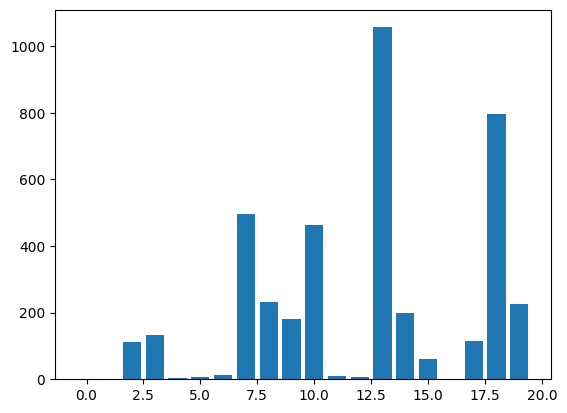

In [21]:
X=churn_labeled.iloc[:,1:]
y=churn_labeled.iloc[:,0]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=1)
feat_select=SelectKBest(score_func=f_classif, k='all')
feat_select.fit(X_train,y_train)
X_train_fs=feat_select.transform(X_train)
X_test_fs=feat_select.transform(X_test)
for i in range(len(feat_select.scores_)):
	print('Feature %d: %f' % (i, feat_select.scores_[i]))
#
plt.bar([i for i in range(len(feat_select.scores_))], feat_select.scores_)
plt.show()